In [1]:
import Acquire.Client
import Acquire.Accounting

In [2]:
user = Acquire.Client.User("chryswoods")

http://fn.acquire-aaai.com:8080/t/identity/s?id=31df3217


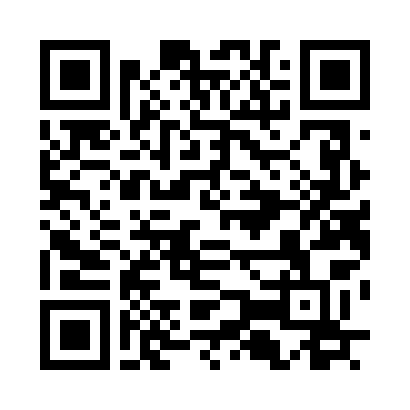

In [3]:
(url, qrcode) = user.request_login()
print(url)
qrcode

In [4]:
user.wait_for_login()
user.is_logged_in()

True

In [5]:
Acquire.Client.deposit(user=user, value=5.0)

{'status': 0,
 'message': 'Success',
 'transaction_records': [{'credit_note': {'account_uid': '5e881469-d772-4fd6-ae51-9123e5b68a38',
    'debit_account_uid': '6960f1e1-be98-40a6-8467-0a89363ebb09',
    'uid': '2019-02-24T20:50:33.802673/5db47ab7',
    'debit_note_uid': '2019-02-24T20:50:33.748106/ddc3fb6c',
    'datetime': '2019-02-24T20:50:33.802673',
    'value': '5.000000',
    'is_provisional': False},
   'debit_note': {'transaction': {'value': '5.000000',
     'description': 'Deposit on 2019-02-24 20:50:31.975425'},
    'account_uid': '6960f1e1-be98-40a6-8467-0a89363ebb09',
    'authorisation': {'user_uid': 'e2e31e35-025c-4a4c-8a7b-65da94e722d6',
     'session_uid': '31df3217-3888-4b2a-aa27-a1f8a1a7b755',
     'identity_url': 'http://fn.acquire-aaai.com:8080/t/identity',
     'identity_uid': 'fdac3ab5-3527-46f8-8432-c7ec8f586fc6',
     'auth_datetime': '2019-02-24T20:50:16.218343',
     'signature': 'VJKPXyA128z56aT5nTZECespst9AfuFbNPXhvymDWedjy2iwiO5HzXjHEqeTwYRiPL3yS7fMjR4DH294

In [6]:
accounts = Acquire.Client.get_accounts(user)

In [7]:
assert(len(accounts) > 1)

In [8]:
for (i,account) in enumerate(accounts):
    print("%4d: %s - balance = %s" % (i, str(account), account.balance()))

   0: Account(name='billing', uid=6960f1e1-be98-40a6-8467-0a89363ebb09) - balance = -72.000000
   1: Account(name='deposits', uid=5e881469-d772-4fd6-ae51-9123e5b68a38) - balance = 72.000000
   2: Account(name='main account', uid=1c0a4fd0-61a7-4290-8936-453d035899ad) - balance = 0.000000


In [9]:
account0 = accounts[0]
account1 = accounts[1]
print(account0, account1)

Account(name='billing', uid=6960f1e1-be98-40a6-8467-0a89363ebb09) Account(name='deposits', uid=5e881469-d772-4fd6-ae51-9123e5b68a38)


In [10]:
transaction = Acquire.Accounting.Transaction(3.5, "test transaction")

In [11]:
record = account0.perform(transaction, account1)

In [12]:
print(record)

[{'credit_note': {'account_uid': '5e881469-d772-4fd6-ae51-9123e5b68a38', 'debit_account_uid': '6960f1e1-be98-40a6-8467-0a89363ebb09', 'uid': '2019-02-24T20:50:36.586118/6378c99b', 'debit_note_uid': '2019-02-24T20:50:36.539238/2161d0f3', 'datetime': '2019-02-24T20:50:36.586118', 'value': '3.500000', 'is_provisional': False}, 'debit_note': {'transaction': {'value': '3.500000', 'description': 'test transaction'}, 'account_uid': '6960f1e1-be98-40a6-8467-0a89363ebb09', 'authorisation': {'user_uid': 'e2e31e35-025c-4a4c-8a7b-65da94e722d6', 'session_uid': '31df3217-3888-4b2a-aa27-a1f8a1a7b755', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/identity', 'identity_uid': 'fdac3ab5-3527-46f8-8432-c7ec8f586fc6', 'auth_datetime': '2019-02-24T20:50:24.239057', 'signature': 'G/ieyooXyrG8QxCrWBY8i9t4zgsNe/siVIbraMClJBd9nRc0jdrs1e7yA7Ptj/j1heqoUP+m7FuU/0Frob/5hvYr1xd8sF4cjf40BmlkiO+r0tpeNOUPr8MWP7LT7+bGUA5F43W2lYhmAUvOkVXd57XBDRZX/itbgi0O47Anp6+ToSDbkYBq1hR0AWAEpRkX0CJsA4rVjb4Rptd87hGzXGsfv148ecoKABM

In [13]:
for (i,account) in enumerate(accounts):
    print("%4d: %s - balance = %s" % (i, str(account), account.balance()))

   0: Account(name='billing', uid=6960f1e1-be98-40a6-8467-0a89363ebb09) - balance = -72.000000
   1: Account(name='deposits', uid=5e881469-d772-4fd6-ae51-9123e5b68a38) - balance = 72.000000
   2: Account(name='main account', uid=1c0a4fd0-61a7-4290-8936-453d035899ad) - balance = 0.000000


In [14]:
user.logout()

{'status': 0, 'message': 'Successfully logged out'}